In [2]:
import pandas as pd

In [3]:
data_path = "/Users/palakaggarwal/Desktop/sem3/CS6242/project/data/"

demo = pd.read_csv(data_path+"demographics.csv")[['location_key', 'population_urban', 'population_rural', 'population_density', 'human_development_index']]
geo = pd.read_csv(data_path+"geography.csv")[['location_key','latitude', 'longitude']]
# epi = pd.read_csv(data_path+"epidemiology.csv")[['location_key','date','new_confirmed', 'new_deceased', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested']]
weather = pd.read_csv(data_path+"weather.csv")[['location_key','date', 'average_temperature_celsius', 'rainfall_mm', 'dew_point', 'relative_humidity']]
# vacc = pd.read_csv(data_path+"vaccinations.csv")[['location_key','date','new_persons_vaccinated', 'cumulative_persons_vaccinated','new_persons_fully_vaccinated', 'cumulative_persons_fully_vaccinated', 'new_vaccine_doses_administered', 'cumulative_vaccine_doses_administered']]
health = pd.read_csv(data_path+"health.csv")[['location_key','diabetes_prevalence', 'smoking_prevalence', 'life_expectancy', 'infant_mortality_rate', 'adult_male_mortality_rate', 'adult_female_mortality_rate', 'comorbidity_mortality_rate', 'health_expenditure_usd', 'out_of_pocket_health_expenditure_usd']]
eco = pd.read_csv(data_path+"economy.csv")[['location_key',"gdp_usd", "gdp_per_capita_usd", "human_capital_index"]]
# govt_resp = pd.read_csv(data_path+"oxford-government-response.csv")
 
# hosp = pd.read_csv(data_path+"hospitalizations.csv")

In [4]:
## List of all countries: 

l = list(demo['location_key'].values)
countries = list(set([str(c).split("_")[0] for c in l]))
print(len(countries))


246


## Merging Non Date DFs

In [5]:
demo = demo[demo['location_key'].isin(countries)].set_index("location_key")
eco = eco[eco['location_key'].isin(countries)].set_index("location_key")
geo = geo[geo['location_key'].isin(countries)].set_index("location_key")
health = health[health['location_key'].isin(countries)].set_index("location_key")

array([[<AxesSubplot:title={'center':'gdp_per_capita_usd'}>]],
      dtype=object)

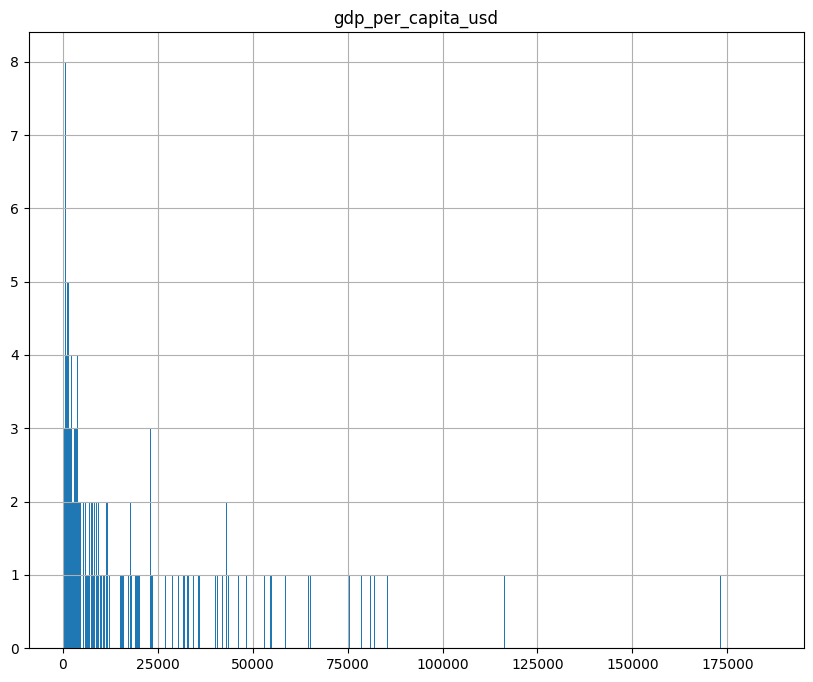

In [14]:
eco
eco.hist(column=["gdp_per_capita_usd"], figsize=(10, 8), bins=1000)

In [47]:
demo = demo.fillna(-1)
eco= eco.fillna(-1)
geo = geo.fillna(-1)
health = health.fillna(-1)

In [48]:
final_df = pd.concat([demo, eco, geo, health], axis = 1)

## Studying Date dataframes

In [49]:
mobility = pd.read_csv(data_path+"mobility.csv")
# m_countries = set([x.split("_")[0] for x in mobility['location_key']])
# print(len(m_countries))
mobility = mobility[mobility['location_key'].isin(countries)]
mobility = mobility.drop(columns = ['date']).groupby("location_key").sum()
mobility.shape

(128, 6)

In [9]:
# mobility['country'] = mobility['location_key'].apply(lambda x:x.split('_')[0])
# mobility.country.nunique()
# mobility

In [50]:
weather = weather[weather['location_key'].isin(countries)].drop(columns = ['date']).groupby('location_key').mean()
weather

,average_temperature_celsius,rainfall_mm,dew_point,relative_humidity
location_key,,,,
AD,14.047082,3.564498,8.358847,70.430583
AE,29.445822,0.228717,16.561974,49.086593
AF,15.037981,2.883515,-3.965845,34.486201
AG,27.141184,1.782191,22.332525,74.281719
AI,27.458482,1.405264,22.425267,73.289682
...,...,...,...,...
YE,29.233084,0.416528,3.726739,21.627160
YT,27.039493,3.797997,22.199705,73.824259
ZA,17.463010,1.553786,4.850230,46.607698


In [51]:
final_df = pd.concat([final_df, weather, mobility], axis=1)
final_df

,population_urban,population_rural,population_density,human_development_index,gdp_usd,gdp_per_capita_usd,human_capital_index,latitude,longitude,diabetes_prevalence,...,average_temperature_celsius,rainfall_mm,dew_point,relative_humidity,mobility_retail_and_recreation,mobility_grocery_and_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential
location_key,,,,,,,,,,,,,,,,,,,,,
AD,67873.0,9269.0,164.394,0.858,3.154058e+09,40886.0,-1.000,42.558333,1.555278,7.7,...,14.047082,3.564498,8.358847,70.430583,NaN,NaN,NaN,NaN,NaN,NaN
AE,8479744.0,1290785.0,118.306,0.863,4.211423e+11,43103.0,0.659,24.400000,54.300000,16.3,...,29.445822,0.228717,16.561974,49.086593,-6167.0,15835.0,-20640.0,-16861.0,-5888.0,8785.0
AF,9797273.0,28244481.0,59.627,0.498,1.910135e+10,502.0,0.389,33.000000,66.000000,9.2,...,15.037981,2.883515,-3.965845,34.486201,37458.0,71757.0,34935.0,-9814.0,-122.0,2673.0
AG,23800.0,73318.0,222.564,0.780,1.727759e+09,17790.0,-1.000,17.116667,-61.850000,13.1,...,27.141184,1.782191,22.332525,74.281719,3690.0,6779.0,50714.0,-28751.0,-20731.0,1951.0
AI,-1.0,-1.0,166.689,-1.000,NaN,NaN,NaN,18.227222,-63.048889,NaN,...,27.458482,1.405264,22.425267,73.289682,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YE,10869523.0,18292399.0,56.492,0.452,2.759126e+10,968.0,0.369,15.500000,48.000000,5.4,...,29.233084,0.416528,3.726739,21.627160,55897.0,75028.0,77007.0,29755.0,23223.0,2941.0
YT,-1.0,-1.0,727.501,-1.000,NaN,NaN,NaN,-12.843056,45.138333,NaN,...,27.039493,3.797997,22.199705,73.824259,NaN,NaN,NaN,NaN,NaN,NaN
ZA,39149717.0,19408553.0,48.891,0.699,3.514316e+11,6001.0,0.406,-29.000000,24.000000,12.7,...,17.463010,1.553786,4.850230,46.607698,-5877.0,12986.0,-1713.0,-16966.0,-11207.0,13487.0


## Covid Severity Index -- Label

In [52]:
label = pd.read_csv(data_path+"covid_severity.csv")[['location_key', 'covid_severity']].set_index("location_key")
label = label[label['covid_severity'].notna()]
label

,covid_severity
location_key,
AD,0.617317
AE,0.105619
AF,0.007053
AG,0.106793
AI,0.265031
...,...
YE,0.001123
YT,0.154065
ZA,0.084916


In [53]:
final_df = pd.concat([final_df, label], axis = 1, join='inner')
# final_df.to_csv(data_path+"linear_regression_dataset.csv")
final_df

,population_urban,population_rural,population_density,human_development_index,gdp_usd,gdp_per_capita_usd,human_capital_index,latitude,longitude,diabetes_prevalence,...,rainfall_mm,dew_point,relative_humidity,mobility_retail_and_recreation,mobility_grocery_and_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential,covid_severity
location_key,,,,,,,,,,,,,,,,,,,,,
AD,67873.0,9269.0,164.394,0.858,3.154058e+09,40886.0,-1.000,42.558333,1.555278,7.7,...,3.564498,8.358847,70.430583,NaN,NaN,NaN,NaN,NaN,NaN,0.617317
AE,8479744.0,1290785.0,118.306,0.863,4.211423e+11,43103.0,0.659,24.400000,54.300000,16.3,...,0.228717,16.561974,49.086593,-6167.0,15835.0,-20640.0,-16861.0,-5888.0,8785.0,0.105619
AF,9797273.0,28244481.0,59.627,0.498,1.910135e+10,502.0,0.389,33.000000,66.000000,9.2,...,2.883515,-3.965845,34.486201,37458.0,71757.0,34935.0,-9814.0,-122.0,2673.0,0.007053
AG,23800.0,73318.0,222.564,0.780,1.727759e+09,17790.0,-1.000,17.116667,-61.850000,13.1,...,1.782191,22.332525,74.281719,3690.0,6779.0,50714.0,-28751.0,-20731.0,1951.0,0.106793
AI,-1.0,-1.0,166.689,-1.000,NaN,NaN,NaN,18.227222,-63.048889,NaN,...,1.405264,22.425267,73.289682,NaN,NaN,NaN,NaN,NaN,NaN,0.265031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YE,10869523.0,18292399.0,56.492,0.452,2.759126e+10,968.0,0.369,15.500000,48.000000,5.4,...,0.416528,3.726739,21.627160,55897.0,75028.0,77007.0,29755.0,23223.0,2941.0,0.001123
YT,-1.0,-1.0,727.501,-1.000,NaN,NaN,NaN,-12.843056,45.138333,NaN,...,3.797997,22.199705,73.824259,NaN,NaN,NaN,NaN,NaN,NaN,0.154065
ZA,39149717.0,19408553.0,48.891,0.699,3.514316e+11,6001.0,0.406,-29.000000,24.000000,12.7,...,1.553786,4.850230,46.607698,-5877.0,12986.0,-1713.0,-16966.0,-11207.0,13487.0,0.084916


## WorldBank Feature Selection

In [29]:
wb = pd.read_csv(data_path+"worldbank.csv")
wb = wb[wb['location_key'].isin(countries)].set_index("location_key")
# print(list(wb.columns))
# print(set([x.split(".")[0] for x in list(wb.columns)]))
lis = ['HD', 'SE', 'SH', 'EG', 'AG', 'VC', 'SN', 'SL', 'IS', 'ST', 'BN', 'EN', 'GB', 'IT', 'GF', 'SP', 'NE', 'IE', 'TX', 'SI', 'DC', 'MS']
cols = []
for x in lis:
    cols.extend([col for col in wb.columns if col.startswith(x)])
wb = wb[cols]

In [30]:
ind = pd.read_csv(data_path+"worldbank_ind.csv").set_index('indicator_code')
ind
for col in wb.columns:
    wb=wb.rename(columns={col:ind.loc[[col]]['indicator_name'].values[0]})
    # print(ind.loc[[col]]['indicator_name'].values[0])
    # break

wb
    

,Human capital index (HCI) (scale 0-1),"Human capital index (HCI), female (scale 0-1)","Human capital index (HCI), lower bound (scale 0-1)","Human capital index (HCI), female, lower bound (scale 0-1)","Human capital index (HCI), male, lower bound (scale 0-1)","Human capital index (HCI), male (scale 0-1)","Human capital index (HCI), upper bound (scale 0-1)","Human capital index (HCI), female, upper bound (scale 0-1)","Human capital index (HCI), male, upper bound (scale 0-1)","Literacy rate, youth female (% of females ages 15-24)",...,"Net ODA provided, total (% of GNI)","Net ODA provided, total (constant 2015 US$)",Arms imports (SIPRI trend indicator values),"Armed forces personnel, total",Armed forces personnel (% of total labor force),Military expenditure (current USD),Military expenditure (current LCU),Military expenditure (% of GDP),Military expenditure (% of general government expenditure),Arms exports (SIPRI trend indicator values)
location_key,,,,,,,,,,,,,,,,,,,,,
AD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AE,0.659,NaN,0.643,NaN,NaN,NaN,0.673,NaN,NaN,99.11000,...,NaN,NaN,644000000.0,63000.0,0.943640,NaN,NaN,NaN,NaN,104000000.0
AF,0.389,0.363,0.376,0.350,0.378,0.395,0.403,0.375,0.412,56.25475,...,NaN,NaN,391000000.0,323000.0,3.246909,1.980863e+08,1.431083e+10,0.984561,3.721788,NaN
AG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
AL,0.621,0.637,0.608,0.624,0.589,0.606,0.634,0.650,0.622,99.63000,...,NaN,NaN,5000000.0,9000.0,0.683439,1.804887e+08,1.949200e+10,1.178901,4.078072,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.43575,...,NaN,NaN,7000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YE,0.369,0.363,0.354,0.349,0.357,0.374,0.381,0.375,0.387,NaN,...,NaN,NaN,9000000.0,40000.0,0.633651,NaN,NaN,NaN,NaN,NaN
ZA,0.406,0.408,0.395,0.396,0.350,0.362,0.417,0.420,0.373,96.87589,...,NaN,NaN,2000000.0,80000.0,0.352470,3.639879e+09,4.821218e+10,0.981710,2.947946,145000000.0


In [31]:
wb_label=pd.concat([wb, label], axis=1, join='inner')
wb_label

,Human capital index (HCI) (scale 0-1),"Human capital index (HCI), female (scale 0-1)","Human capital index (HCI), lower bound (scale 0-1)","Human capital index (HCI), female, lower bound (scale 0-1)","Human capital index (HCI), male, lower bound (scale 0-1)","Human capital index (HCI), male (scale 0-1)","Human capital index (HCI), upper bound (scale 0-1)","Human capital index (HCI), female, upper bound (scale 0-1)","Human capital index (HCI), male, upper bound (scale 0-1)","Literacy rate, youth female (% of females ages 15-24)",...,"Net ODA provided, total (constant 2015 US$)",Arms imports (SIPRI trend indicator values),"Armed forces personnel, total",Armed forces personnel (% of total labor force),Military expenditure (current USD),Military expenditure (current LCU),Military expenditure (% of GDP),Military expenditure (% of general government expenditure),Arms exports (SIPRI trend indicator values),covid_severity
location_key,,,,,,,,,,,,,,,,,,,,,
AD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.617317
AE,0.659,NaN,0.643,NaN,NaN,NaN,0.673,NaN,NaN,99.11000,...,NaN,644000000.0,63000.0,0.943640,NaN,NaN,NaN,NaN,104000000.0,0.105619
AF,0.389,0.363,0.376,0.350,0.378,0.395,0.403,0.375,0.412,56.25475,...,NaN,391000000.0,323000.0,3.246909,1.980863e+08,1.431083e+10,0.984561,3.721788,NaN,0.007053
AG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.106793
AL,0.621,0.637,0.608,0.624,0.589,0.606,0.634,0.650,0.622,99.63000,...,NaN,5000000.0,9000.0,0.683439,1.804887e+08,1.949200e+10,1.178901,4.078072,NaN,0.127867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.43575,...,NaN,7000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.081543
YE,0.369,0.363,0.354,0.349,0.357,0.374,0.381,0.375,0.387,NaN,...,NaN,9000000.0,40000.0,0.633651,NaN,NaN,NaN,NaN,NaN,0.001123
ZA,0.406,0.408,0.395,0.396,0.350,0.362,0.417,0.420,0.373,96.87589,...,NaN,2000000.0,80000.0,0.352470,3.639879e+09,4.821218e+10,0.981710,2.947946,145000000.0,0.084916


## FEATURE IMPORTANCE AND SELECTION

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
import numpy as np

# WORLDBANK DATASET
X = wb_label
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X = X.dropna(axis=1, thresh=200)
X = X.dropna(axis=0, how='any')
X
# y = X['covid_severity']
# X = X.drop(columns=['covid_severity'])

# model = RandomForestRegressor()
# model.fit(X, y)
# importance = model.feature_importances_


# print(len(importance))
# for i in range(len(importance)):
#     print(f"{X.columns[i]} : {importance[i]*100}")


,Primary school starting age (years),"Primary education, duration (years)",Lower secondary school starting age (years),"Secondary education, duration (years)",People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population),Diabetes prevalence (% of population ages 20 to 79),People practicing open defecation (% of population),"Tuberculosis case detection rate (%, all forms)","Incidence of tuberculosis (per 100,000 people)",...,Secure Internet servers (per 1 million people),Individuals using the Internet (% of population),Population growth (annual %),"Population, total",Rural population,Rural population (% of total population),Urban population growth (annual %),Urban population,Urban population (% of total population),covid_severity
location_key,,,,,,,,,,,,,,,,,,,,,
AD,6.0,6.0,12.0,6.0,99.999996,99.999996,7.7,0.000000,87.0,3.0,...,20183.557595,91.567467,0.176454,77142.0,9269.0,12.016,0.088439,67873.0,87.984,0.617317
AE,6.0,5.0,11.0,7.0,98.045507,98.586009,16.3,0.058700,87.0,1.0,...,1912.076613,98.450002,1.438780,9770529.0,1290785.0,13.211,1.746897,8479744.0,86.789,0.105619
AF,7.0,6.0,13.0,6.0,67.064623,43.417610,9.2,12.740186,69.0,189.0,...,27.522390,13.500000,2.311817,38041754.0,28244481.0,74.246,3.322572,9797273.0,25.754,0.007053
AG,5.0,7.0,12.0,5.0,96.739186,87.504282,13.1,0.264129,87.0,6.0,...,895.817459,76.000000,0.860380,97118.0,73318.0,75.494,0.484364,23800.0,24.506,0.106793
AL,6.0,5.0,11.0,7.0,91.039228,97.718368,9.0,0.000000,87.0,18.0,...,767.292728,71.847041,-0.426007,2854191.0,1106598.0,38.771,1.071414,1747593.0,61.229,0.127867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WS,5.0,6.0,11.0,7.0,97.382595,98.167939,9.2,0.104139,87.0,6.4,...,471.848887,33.610939,0.491829,197097.0,161509.0,81.944,-0.538058,35588.0,18.056,0.081543
YE,6.0,6.0,12.0,6.0,63.473474,59.053003,5.4,19.573479,71.0,48.0,...,4.423577,26.718355,2.300580,29161922.0,18292399.0,62.727,4.007985,10869523.0,37.273,0.001123
ZA,7.0,7.0,14.0,5.0,92.678702,75.747098,12.7,1.445457,76.0,520.0,...,14353.105035,56.167394,1.338617,58558270.0,19408553.0,33.144,2.090812,39149717.0,66.856,0.084916


In [42]:
corr_wb = X.corr()
corr_wb.to_csv(data_path+"wb_corr_matrix.csv")

col_corr_wb = set()
for i in range(len(corr_wb.columns)):
    for j in range(i):
        # print(corr_wb.columns[j].replace(",", " ")) 
        print(f"{corr_wb.columns[j].replace(',', ' ')}, {corr_wb.columns[i].replace(',', ' ')}, {corr_wb.iloc[i,j]}")
        # if abs(corr_wb.iloc[i, j])>0.8:
        #     if abs(corr_wb.iloc[i, -1])>=abs(corr_wb.iloc[j, -1]):
        #         colname = corr_wb.columns[j]
        #     else:
        #         colname = corr_wb.columns[i]
            # print(f"corr between {corr_wb.columns[j]} and {corr_wb.columns[i]} is : {corr_wb.iloc[i,j]}")
            # print(f"corr between {corr_wb.columns[i]} and {corr_wb.columns[-1]} is : {corr_wb.iloc[i, -1]}")
            # print(f"corr between {corr_wb.columns[j]} and {corr_wb.columns[-1]} is : {corr_wb.iloc[j, -1]}")

#             col_corr_wb.add(colname)
# print(col_corr_wb)

Primary school starting age (years), Primary education  duration (years), -0.2473099970553077
Primary school starting age (years), Lower secondary school starting age (years), 0.37834936383759055
Primary education  duration (years), Lower secondary school starting age (years), 0.8033388826932168
Primary school starting age (years), Secondary education  duration (years), 0.11447125311316736
Primary education  duration (years), Secondary education  duration (years), -0.7155627116494865
Lower secondary school starting age (years), Secondary education  duration (years), -0.6132493978793757
Primary school starting age (years), People using at least basic drinking water services (% of population), -0.2442367708158756
Primary education  duration (years), People using at least basic drinking water services (% of population), -0.20203178572881825
Lower secondary school starting age (years), People using at least basic drinking water services (% of population), -0.3431202802190314
Secondary educ

In [20]:
wb_feat_sel = X.drop(columns = col_corr_wb)
X_train_wb = wb_feat_sel.drop(columns = ['covid_severity'])
y_train_wb = wb_feat_sel['covid_severity']


from sklearn.ensemble import RandomForestRegressor
model_wb = RandomForestRegressor()

model_wb.fit(X_train_wb,y_train_wb)

importance_wb = model_wb.feature_importances_
# print(importance)

feature_imp = {}
for i,v in enumerate(importance_wb):
	feature_imp[X_train_wb.columns[i]] = importance_wb[i]

f_imp = dict(sorted(feature_imp.items(), key = lambda x:x[1], reverse = True))

In [21]:
f_imp

{'Secure Internet servers (per 1 million people)': 0.5690885083127076,
 'Individuals using the Internet (% of population)': 0.06914158242233756,
 'Fixed telephone subscriptions (per 100 people)': 0.06029024986644694,
 'Agricultural land (sq. km)': 0.04687565969323327,
 'Incidence of tuberculosis (per 100,000 people)': 0.03094214443420122,
 'Rural population': 0.023812268886216594,
 'Mobile cellular subscriptions (per 100 people)': 0.022286738322706622,
 'Urban population growth (annual %)': 0.02116198863587551,
 'Population density (people per sq. km of land area)': 0.021094276963694602,
 'Mammal species, threatened': 0.014527689480835815,
 'Lower secondary school starting age (years)': 0.010678668246992781,
 'Plant species (higher), threatened': 0.00976277155971414,
 'Diabetes prevalence (% of population ages 20 to 79)': 0.009674881969629873,
 'Urban population (% of total population)': 0.009323449476719259,
 'Forest area (% of land area)': 0.009300937852764455,
 'Secure Internet serv

In [22]:
# f_imp
f_imp = pd.DataFrame(f_imp.items(), columns = ['indicator_code', 'importance_wrt_covid_severity']).to_csv(data_path+"World_Bank_feature_importance_wrt_covid_severity.csv")
# f_imp_ind = pd.concat([f_imp, ind], axis=1, join = 'inner')
# f_imp_ind
# f_imp_ind.to_csv(data_path+"World_Bank_feature_importance_wrt_covid_severity.csv")

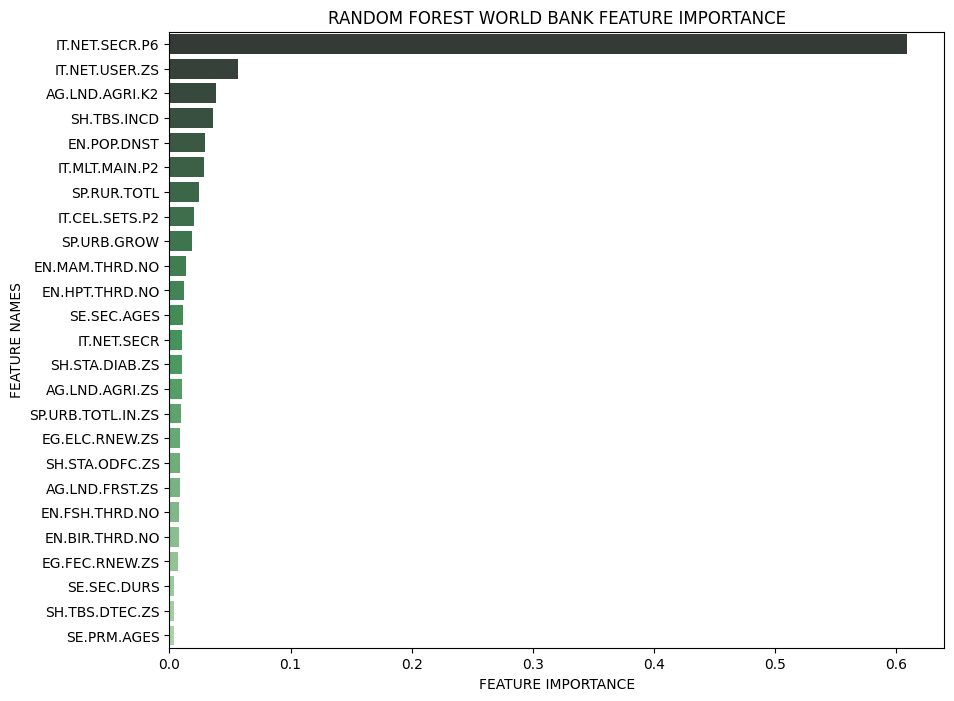

In [37]:
plot_feature_importance(importance_wb, X_train_wb.columns, 'RANDOM FOREST WORLD BANK')

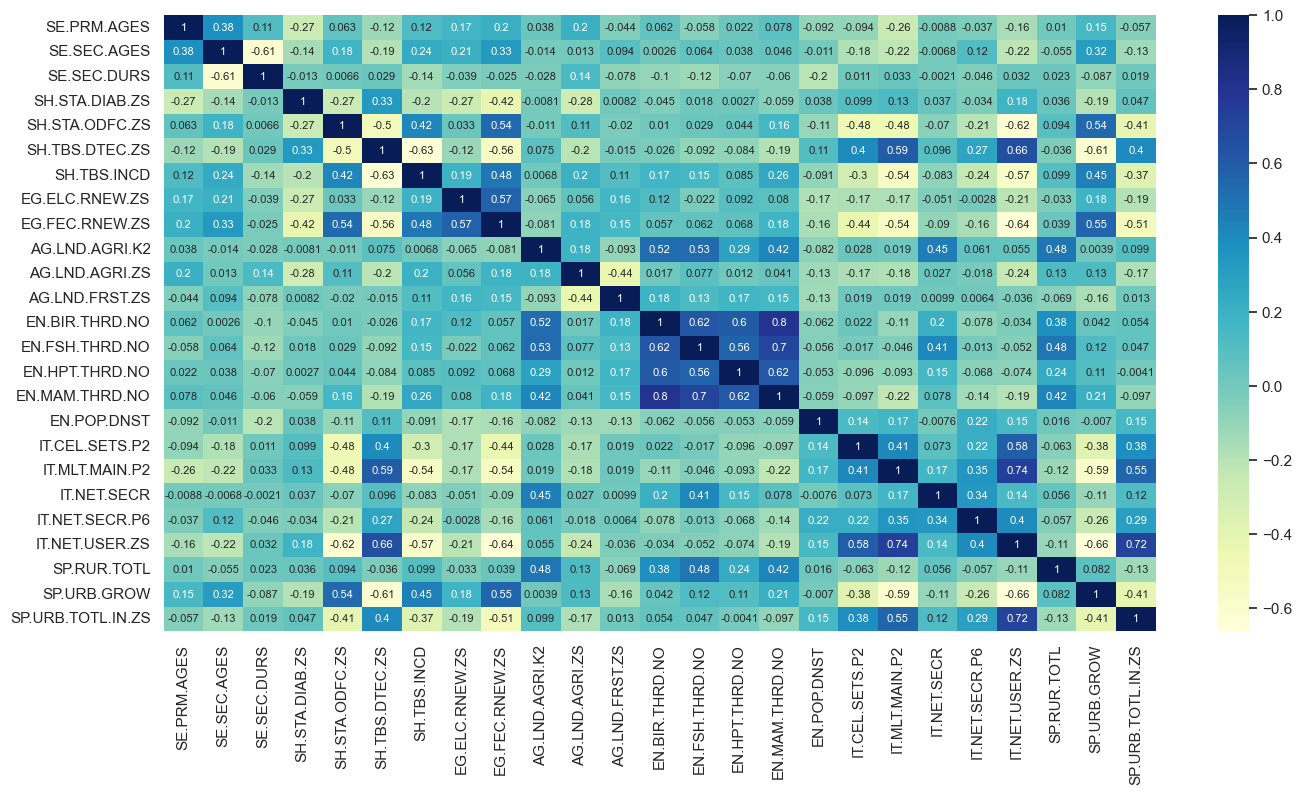

In [154]:
## CORRELATION HEATMAP FOR SELECTED FEATURES for World bank
s_corr = X_train_wb.corr()
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(X_train_wb.corr(), annot = True, annot_kws={"fontsize":8}, fmt='.2g',cmap= 'YlGnBu')
plt.savefig("/Users/palakaggarwal/Desktop/sem3/CS 6242/project/Plots/wb_corr_heatmap_sel_features.png")


## FEATURE IMPORTANCE (not WORLD BANK)

In [56]:
# ALL DATA WITH WORLDBANK
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_final = final_df
X_final = X_final.dropna(axis=0, how ='any')
# print(X_final)

y_final = X_final['covid_severity']
# X_final = X_final.drop(columns=['covid_severity'])
# X_final = scaler.fit_transform(X_final)

# print(X_final)

corr = X_final.corr()
col_corr = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j])>0.8:
            if abs(corr.iloc[i, -1])>=abs(corr.iloc[j, -1]):
                colname = corr.columns[j]
            else:
                colname = corr.columns[i]
            print(f"corr between {corr.columns[j]} and {corr.columns[i]} is : {corr.iloc[i,j]}")
            print(f"corr between {corr.columns[i]} and {corr.columns[-1]} is : {corr.iloc[i, -1]}")
            print(f"corr between {corr.columns[j]} and {corr.columns[-1]} is : {corr.iloc[j, -1]}")

            col_corr.add(colname)
print(col_corr)

# model = RandomForestRegressor()

# model.fit(X_final,y_final)

# importance = model.feature_importances_
# # print(importance)

# feature_imp = {}
# for i,v in enumerate(importance):
# 	feature_imp[final_df.columns[i]] = importance[i]*100

# f_imp = dict(sorted(feature_imp.items(), key = lambda x:x[1], reverse = True))
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()


corr between population_urban and population_rural is : 0.8181789226162641
corr between population_rural and covid_severity is : -0.16308523055791205
corr between population_urban and covid_severity is : -0.08580160750773164
corr between life_expectancy and infant_mortality_rate is : -0.9227086116698939
corr between infant_mortality_rate and covid_severity is : -0.6876419916799908
corr between life_expectancy and covid_severity is : 0.7297769314540571
corr between life_expectancy and adult_male_mortality_rate is : -0.8662855592672368
corr between adult_male_mortality_rate and covid_severity is : -0.6022906634746019
corr between life_expectancy and covid_severity is : 0.7297769314540571
corr between life_expectancy and adult_female_mortality_rate is : -0.9349720943599322
corr between adult_female_mortality_rate and covid_severity is : -0.6416950315929968
corr between life_expectancy and covid_severity is : 0.7297769314540571
corr between infant_mortality_rate and adult_female_mortality_

In [57]:
X_feat_sel = X_final.drop(columns = col_corr)
X_train = X_feat_sel.drop(columns = ['covid_severity'])
y_train = X_feat_sel['covid_severity']


In [58]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

model.fit(X_train,y_train)

importance = model.feature_importances_
# print(importance)

feature_imp = {}
for i,v in enumerate(importance):
	feature_imp[X_train.columns[i]] = importance[i]

f_imp = dict(sorted(feature_imp.items(), key = lambda x:x[1], reverse = True))
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()

In [59]:
f_imp
pd.DataFrame(f_imp.items(), columns = ['feature', 'importance_wrt_covid_severity']).to_csv(data_path+"feature_importance_wrt_covid_severity")

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    #Color palette
    pal = sns.color_palette("Greens_d", len(fi_df['feature_importance']))
    rank = fi_df['feature_importance'].argsort()[::-1]
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'], palette=np.array(pal[::-1])[rank])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.savefig('/Users/palakaggarwal/Desktop/sem3/CS6242/project/Plots/'+'feature_importance_wb.png')
    

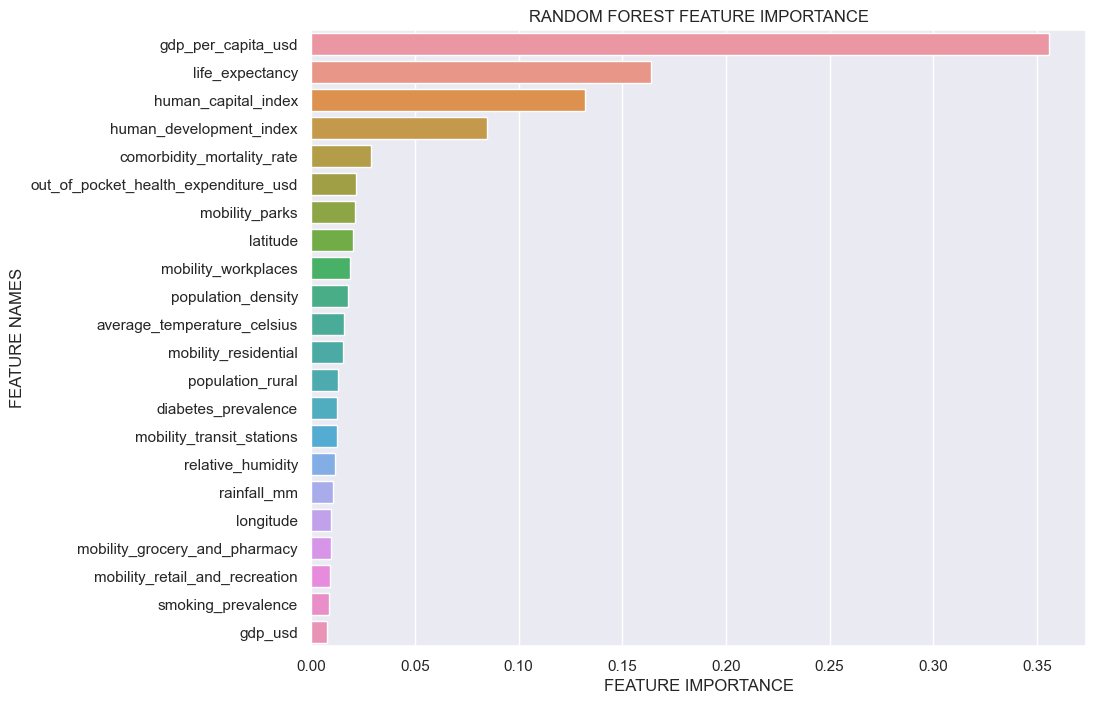

In [160]:
plot_feature_importance(importance, X_train.columns, 'RANDOM FOREST')

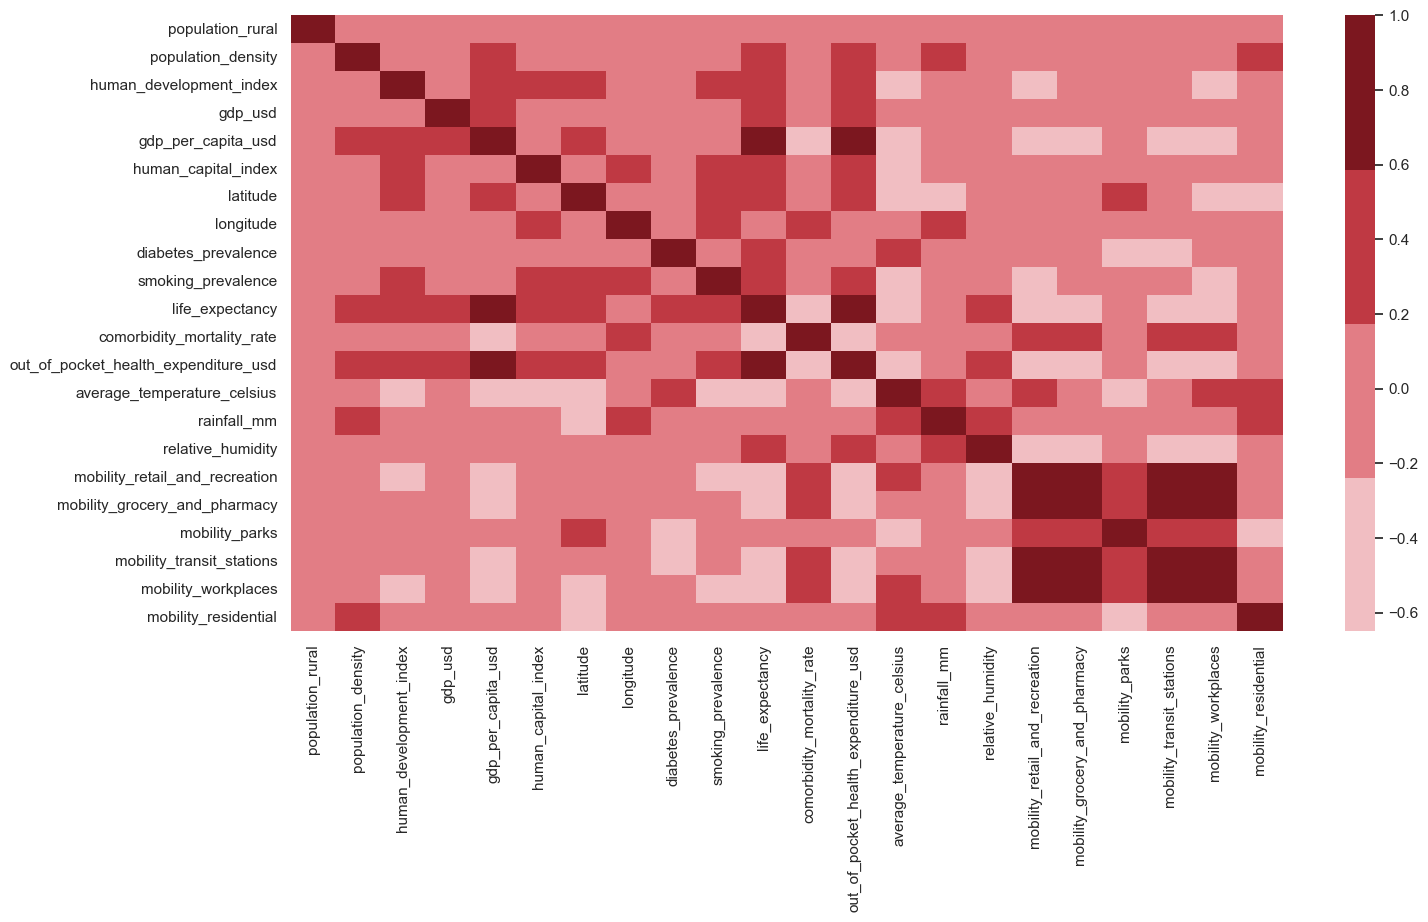

In [32]:
## CORRELATION HEATMAP FOR SELECTED FEATURES
import seaborn as sns
colors = ["#F1BEC2", "#E27D85", "#BF3943", "#7C171F"]

customPalette = sns.set_palette(sns.color_palette(colors))
s_corr = X_train.corr()
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(X_train.corr(), annot = False, fmt='.2g',cmap = customPalette)
plt.savefig("/Users/palakaggarwal/Desktop/sem3/CS 6242/project/Plots/corr_heatmap_sel_features.png")
